# Trend Changes

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/HospitalityEmployees.csv

--2020-10-05 10:43:54--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/HospitalityEmployees.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.98
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5596 (5.5K) [application/vnd.ms-excel]
Saving to: ‘HospitalityEmployees.csv’

HospitalityEmployee 100%[===================>]   5.46K  --.-KB/s    in 0s      

2020-10-05 10:43:54 (284 MB/s) - ‘HospitalityEmployees.csv’ saved [5596/5596]



In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv('HospitalityEmployees.csv')

In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

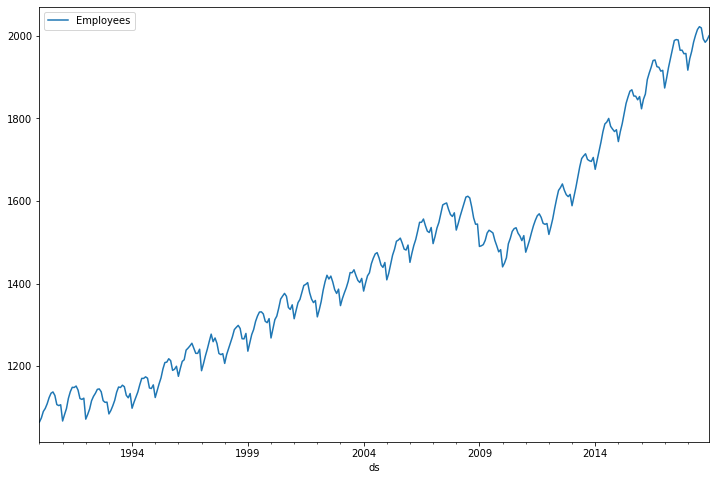

In [5]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [6]:
len(df)

348

In [7]:
len(df) - 12

336

In [8]:
train = df.iloc[:336]
test = df.iloc[336:]

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


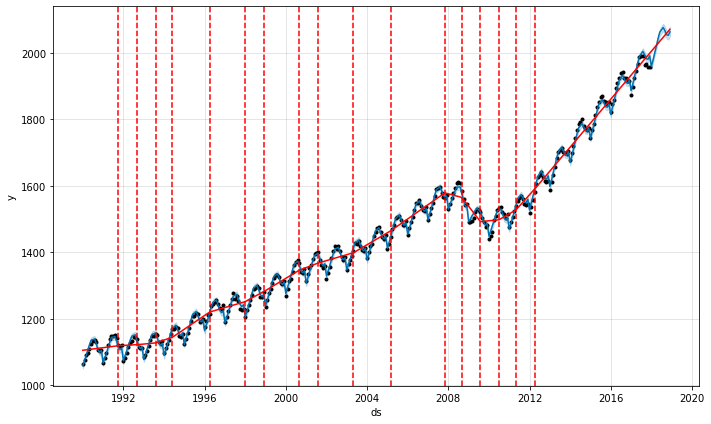

In [13]:
from fbprophet.plot import add_changepoints_to_plot
#gca= get current axis

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)